# Multiple Linear Regression

Analysis of basic UK Climate Data using Multiple Regression (with [statsmodels](https://www.statsmodels.org/stable/index.html))

## Setup
Load required packages

In [1]:
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import seaborn as sns

The data are for 20 weather stations across the UK. Read the data file into a Pandas DataFrame and check

In [2]:
df = pd.read_csv('../../data/climate/UKJanClimate.csv', header=0)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   max_temp  20 non-null     float64
 1   min_temp  20 non-null     float64
 2   rainfall  20 non-null     float64
 3   Elev      20 non-null     int64  
 4   Lat       20 non-null     float64
 5   Long      20 non-null     float64
dtypes: float64(5), int64(1)
memory usage: 1.1 KB


In [17]:
df.head(10)

,max_temp,min_temp,rainfall,Elev,Lat,Long
0,6.7,1.2,67.0,128,51.800,-0.350
1,8.1,3.1,41.6,47,51.477,0.004
2,7.8,2.2,82.3,59,51.454,-2.587
3,8.8,2.7,82.2,27,50.737,-3.405
4,6.7,1.4,73.2,66,52.767,-2.433
5,6.8,1.9,83.4,84,53.383,-1.483
6,9.2,3.8,123.5,32,50.352,-3.578
7,7.6,2.5,170.7,120,50.597,-3.716
8,6.0,1.0,202.7,324,51.772,-3.245
9,8.2,3.6,75.5,10,53.252,-4.537


# Checking Collinearity

Independent variables must not be collinear (i.e. correlated amongst themselves). Generally variables need to be r < 0.5 or r > -0.5

Check using a correlation matrix on our dataframe

In [4]:
df.corr().round(3)

,max_temp,min_temp,rainfall,Elev,Lat,Long
max_temp,1.000,0.894,-0.135,-0.646,-0.683,-0.135
min_temp,0.894,1.000,-0.122,-0.567,-0.644,-0.017
rainfall,-0.135,-0.122,1.000,0.475,-0.017,-0.540
Elev,-0.646,-0.567,0.475,1.000,0.079,-0.222
Lat,-0.683,-0.644,-0.017,0.079,1.000,-0.073
Long,-0.135,-0.017,-0.540,-0.222,-0.073,1.000


<AxesSubplot:>

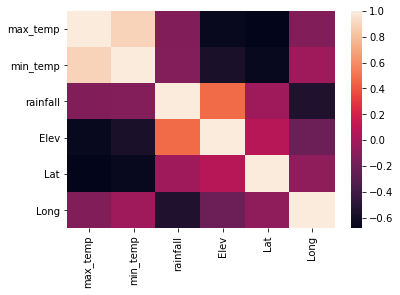

In [5]:
corrmat = df.corr()  #save as an object
sns.heatmap(corrmat)  #then pass to heatmap

<AxesSubplot:>

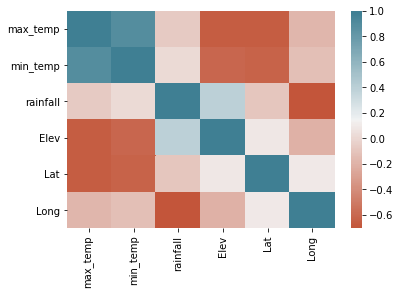

In [6]:
#with our own palette
sns.heatmap(df.corr(method='spearman'), cmap=sns.diverging_palette(20, 220, n=200))

# Fitting & Selecting Models 

## Fitting

For a single variable we could do:

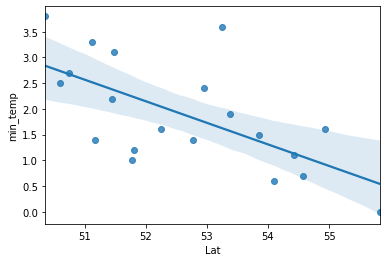

In [7]:
#regplot adds a regression line https://seaborn.pydata.org/tutorial/regression.html
sns.regplot(x="Lat",
           y="min_temp",
           data=df)
plt.show()

In [8]:
#require import statsmodels.formula.api as smf
lat_mod = smf.ols("min_temp ~ Lat", data=df).fit()
print (lat_mod.summary())

                            OLS Regression Results                            
Dep. Variable:               min_temp   R-squared:                       0.414
Model:                            OLS   Adj. R-squared:                  0.382
Method:                 Least Squares   F-statistic:                     12.72
Date:                Tue, 16 Mar 2021   Prob (F-statistic):            0.00220
Time:                        10:59:53   Log-Likelihood:                -23.402
No. Observations:                  20   AIC:                             50.80
Df Residuals:                      18   BIC:                             52.79
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     23.9423      6.188      3.869      0.0

For multiple predictor (independent) variables:

In [9]:
#require import statsmodels.formula.api as smf
lat_elev_mod = smf.ols("min_temp ~ Lat + Elev", data=df).fit()
print (lat_elev_mod.summary())

                            OLS Regression Results                            
Dep. Variable:               min_temp   R-squared:                       0.683
Model:                            OLS   Adj. R-squared:                  0.645
Method:                 Least Squares   F-statistic:                     18.29
Date:                Tue, 16 Mar 2021   Prob (F-statistic):           5.78e-05
Time:                        10:59:53   Log-Likelihood:                -17.266
No. Observations:                  20   AIC:                             40.53
Df Residuals:                      17   BIC:                             43.52
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     23.0995      4.691      4.925      0.0

In [10]:
#require import statsmodels.formula.api as smf
lat_elev_lon_mod = smf.ols("min_temp ~ Lat + Elev + Long", data=df).fit()
print (lat_elev_lon_mod.summary())

                            OLS Regression Results                            
Dep. Variable:               min_temp   R-squared:                       0.716
Model:                            OLS   Adj. R-squared:                  0.662
Method:                 Least Squares   F-statistic:                     13.43
Date:                Tue, 16 Mar 2021   Prob (F-statistic):           0.000123
Time:                        10:59:54   Log-Likelihood:                -16.171
No. Observations:                  20   AIC:                             40.34
Df Residuals:                      16   BIC:                             44.32
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     23.2774      4.579      5.083      0.0

## Model Selection

Comparing the last few models:

- which has the best $r^2$?
- which independent variables are statistically significant at 95% confidence? 
- which model has the smallest AIC?
- which models have differences in AIC (from the min) >2?
- how do the Adjusted $r^2$ of the models look?


The three-variable model has the largest $r^2$ (and Adjusted $r^2$) so explains most overall variation. However, the `Long` variable is not statistically significant (at 95% confidence). And the difference in AIC between two- and three-variables models is <2.   

So... 

- For explanation, the two-variable model would be best as it is the most parsimonious and all independent variables are stat. sig. at 95%
- For prediction, use three-variable model as it explains the most overall variance (i.e. is the most predictive)

# Model Diagnostics

As we created models above we really should have check model diagnostics to check assumptions of regression had not been violated. Let's just do it for the two-variable model here. 

## Normality of Residuals

Text(0.5, 0, 'Residuals')

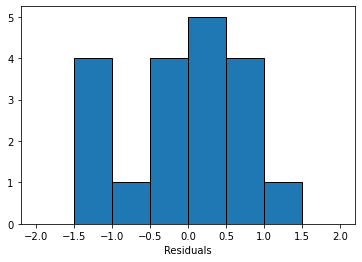

In [11]:
#n=20 so important to check normality!
plt.hist(lat_elev_mod.resid_pearson, 
         edgecolor='black',
         bins=[-2,-1.5,-1,-0.5,0,0.5,1,1.5,2])
plt.xlabel('Residuals')

Text(0, 0.5, 'Standardized Residuals (z)')

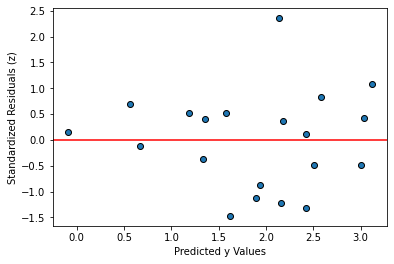

In [12]:
#better to make our own plot using standardised residuals (resid_pearson from the model object)
plt.plot(lat_elev_mod.fittedvalues, lat_elev_mod.resid_pearson,
         'oC0',  
         markeredgecolor='black')
plt.axhline(c = 'red')
plt.xlabel('Predicted y Values')
plt.ylabel('Standardized Residuals (z)')  

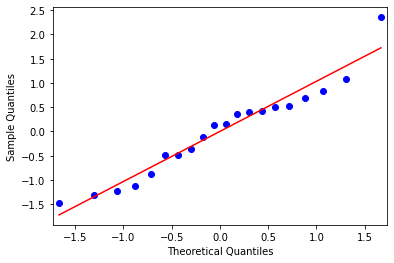

In [13]:
#lots of other ways to check (see https://www.statsmodels.org/dev/generated/statsmodels.graphics.gofplots.qqplot.html)
qqfig = sm.qqplot(lat_elev_mod.resid_pearson, line='r')

## Leverage and Influence

*Leverage* is an indicator of how extreme our independent variable (i.e. elevation, latitude) values are for each observation (i.e. each location). It's important to identify observations with high leverage because in certain situations they may have an undue *influence* on the estimated regression function (and parameters). Points with undue influence should be considered for removal from the data used for a regression model (because there is something about them that means that are 'different' from the remaining data).

Note, as [Charles Zaiontz](https://www.real-statistics.com/multiple-regression/outliers-and-influencers/) points out:

> Keep in mind that since we are dealing with a multi-dimensional model, there may be data points that look perfectly fine in any single dimension but are multivariate outliers. E.g. for the general population, there is nothing unusual about a 6-foot man or a 125-pound man, but a 6-foot man that weighs 125 pounds is unusual.

There's a nice intuitive blog on [Leverage and Influence in a Nutshell](https://www.r-bloggers.com/2016/06/leverage-and-influence-in-a-nutshell/) with an interactive plot that might help to understand the different issues discussed here (also see the other sources linked to here, and readings).  

### The Influence Plot

We can use [the `influence_plot` from statsmodels](https://www.statsmodels.org/dev/generated/statsmodels.graphics.regressionplots.influence_plot.html) to visualise leverage and influence:

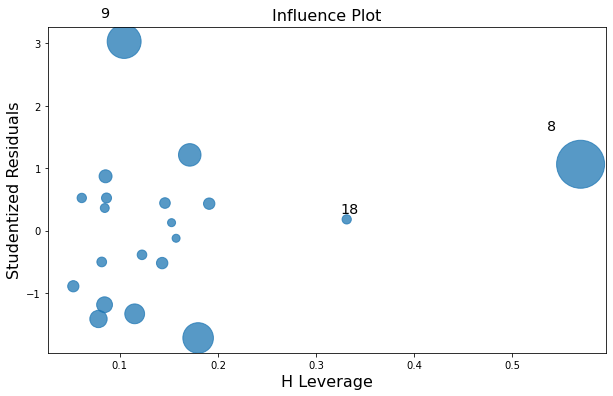

In [14]:
fig, ax = plt.subplots(figsize=(10,6))
fig = sm.graphics.influence_plot(lat_elev_mod, alpha=0.05, 
                                 criterion="cooks", ax=ax)

The y-axis on this plot is the 'studentized' residuals - this is the same as 'standardized' residuals (z). This axis helps to identify outliers:

> In linear regression, an outlier is an observation with large residual. In other words, it is an observation whose dependent-variable value is unusual given its values on the predictor variables. An outlier may indicate a sample peculiarity or may indicate a data entry error or other problem. [[source](https://songhuiming.github.io/pages/2016/11/27/linear-regression-in-python-outliers-leverage-detect/)]

The x-axis on this plot is the measure of leverage. Leverage is:

>  a measure of the distance between the $x$ value for the data point [i.e., observation] and the mean of the $x$ values for all $n$ data points. The leverage is a number between 0 and 1, inclusive. The sum of the equals $p$, the number of parameters (regression coefficients including the intercept). [[source](https://online.stat.psu.edu/stat501/lesson/11/11.2)]

High leverage points [can be assumed](https://online.stat.psu.edu/stat501/lesson/11/11.2) to be those with leverage more than 3 times larger than the mean leverage.

The size of the point indicates the value of [Cook's Distance](https://www.statsmodels.org/stable/generated/statsmodels.graphics.regressionplots.influence_plot.html) (we specified that with the `criterion` argument to `influence_plot`).

> If we remove a point from the sample, then the equation for regression line changes. Points that have the most influence produce the largest change in the equation of the regression line. A measure of this influence is called *Cook’s Distance*. [[source](https://www.real-statistics.com/multiple-regression/outliers-and-influencers/)]

Different people argue for different thresholds of Cook's Distance ($D$) greater than which a point should be considered as having undue influence. Some argue ($D=1$) is an appropriate threshold (as Cook himself did), while [others argue](https://stats.stackexchange.com/questions/87962/cooks-distance-cut-off-value) the threshold should be $4/n$, where $n$ is the number of data points. 

A problem with the statsmodels `influence_plot` is that it is difficult to know what value of $D$ a point has from the size of the point (especially as no legend is provided; we'll see how to output the actual $D$ values below).
  
Note that three points are labelled on the plot. Points that are labelled are:

- outliers on the y-axis. 
- high leverage points on the x-axis. 

The definition of an outlier for statsmodels is given by the `alpha` argument. Here we used `0.05` so an outlier is any point with a standardized residual <-1.96 or >1.96 [[source](https://songhuiming.github.io/pages/2016/11/27/linear-regression-in-python-outliers-leverage-detect/)]. Statsmodels defines a high leverage point as $2\frac{(df + 1)}{n}$ where $df$ is the degrees of freedom of the model. 

However, just because a point is indicated in the `influence_plot` with a label, does not mean these points actually have *undue* influence. Ultimately, because influence can be thought of as the product of leverage and outlierness, the points we want to be most worried about are:

- those with high $D$ (i.e the largest points)
- those points with both high leverage and large (absolute) residuals (i.e. those in the top right or bottom right corners of the plot). 

As noted above it is difficult to assess from the point size what the value of Cook's Distance $D$ is. We can access the values directly as follows:

In [15]:
lat_elev_mod.get_influence().cooks_distance[0]

array([0.04215318, 0.02403809, 0.00772762, 0.01559586, 0.0148175 ,
       0.00626686, 0.09881305, 0.00106949, 0.49520275, 0.24100009,
       0.0533576 , 0.07340911, 0.00430093, 0.00095666, 0.0090684 ,
       0.01176918, 0.19315435, 0.01554718, 0.00580292, 0.0072719 ])

From this we can see we have no points with $D>1$ but using the $D > 4/n$ (0.2) we find that two points could be considered to have undue influence. 

However, 

> It’s important to note that Cook’s Distance is often used as a way to identify influential data points. Just because a data point is influential doesn’t mean it should necessarily be deleted – first you should check to see if the data point has simply been incorrectly recorded or if there is something strange about the data point that may point to an interesting finding. [[source](https://www.statology.org/how-to-identify-influential-data-points-using-cooks-distance/)]

In this case, points 8 and 9 are ones we should consider investigating further (8 due to highest $D$ value and 9 because it's an outlier with some leverage, but not too extreme) and all other points are likely fine. 

### Partial Regression Plots

Another way to visualise leverage and influence that some people use is [partial regression plots](https://en.wikipedia.org/wiki/Partial_regression_plot). 

The partial regression plot is useful to detect outliers and check that the relationships between independent and dependent variables make sense. In univariate regression identifying these things would be straight-forward with a scatter plot of the dependent variable against the (single) independent variable. However, it is not so striaght-forward to do this for multivariate regression models. Remember,

>The estimates of the beta values measure the expected change in the Y value, given a one-unit change in the X variable, *holding all other X variables constant*. (Harris 2016, p.197, emphasis added)

Simply regressing multiple independent variables against the dependent variable do not visualise the results of the multiple regression model, because the other independent variables are not being held constant (and as we saw above, all independent variables are correlated to a degree). However, partial regression plots *are* able to to control for this variation. 

A partial regression plot is a scatter plot of residuals from regression models of:

- the dependent variable against all the independent variables except the one of interest
- the independent variable of interest against all the other independent variables

This means we get a scatter plot for *every* independent variable (as well as the intercept). 

We can use [the `plot_partregress_grid` function](https://www.statsmodels.org/dev/generated/statsmodels.graphics.regressionplots.plot_partregress_grid.html) in statsmodels to produce a partial regression plot for our `lat_elev_mod` fit model object:

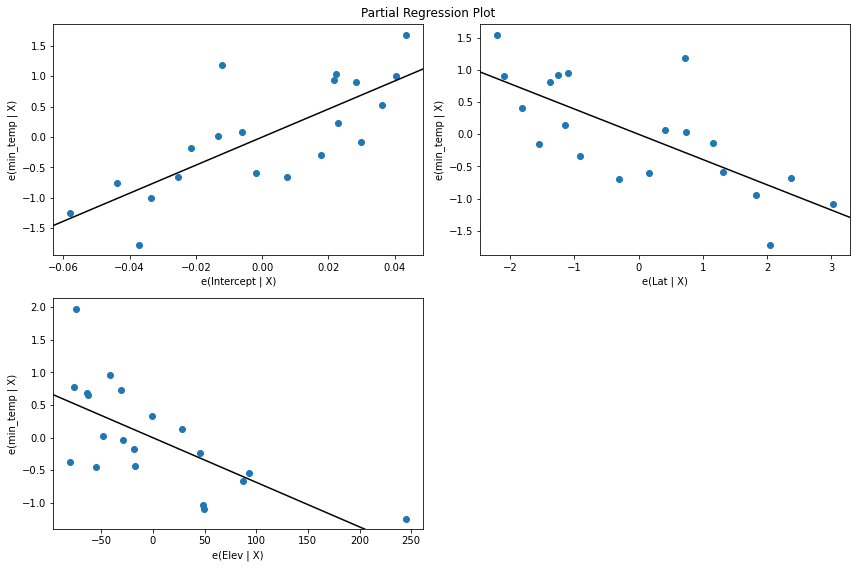

In [16]:
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_partregress_grid(lat_elev_mod, fig=fig)

In these scatter plots the OLS regression line has a slope $\beta_i$ (i.e. the regression coefficient from the model) and intercept zero. Outliers are points far from the OLS regression line in the partial regression scatter plots. 

# Further Reading

Chapter 10 in Harris (2016) *Quantitative Geography* London: SAGE

Chapter 7 in Harris and Jarvis (2011) *Statistics for Geography and Environmental Science* Harlow: Prentice-Hall

# Credits!

## Contributors:
The following individual(s) have contributed to these teaching materials: James Millington (james.millington@kcl.ac.uk).

## License
These teaching materials are licensed under a mix of [The MIT License](https://opensource.org/licenses/mit-license.php) and the [Creative Commons Attribution-NonCommercial-ShareAlike 4.0 license](https://creativecommons.org/licenses/by-nc-sa/4.0/).